### XGBoost

#### Zanim o samym algorytmie, musimy omówić czym jest Gradient Boosting (wzmocnienie gradientowe) 

**Gradient** – pole wektorowe wskazujące kierunki najszybszych wzrostów wartości danego pola skalarnego.

**Gradient funkcji** to wektor, który wskazuje kierunek najszybszego wzrostu wartości tej funkcji. Dla funkcji wielu zmiennych, gradient składa się z pochodnych cząstkowych względem każdej zmiennej. Mówiąc prościej, gradient pokazuje, jak zmienia się wartość funkcji, gdy zmieniamy jej argumenty. Dzięki gradientowi można znaleźć lokalne ekstremum funkcji, czyli miejsca, gdzie funkcja osiąga swoje maksima lub minima.

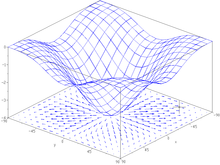

Gradient funkcji 
 ${\displaystyle f(x,y)=-(\cos ^{2}x+\cos ^{2}y)^{2}}$ przedstawiony jako pole wektorowe na dolnej płaszczyźnie.

###### Z tego powodu gradient będzie wykorzystywany do wskazywania kierunku, w którym nasz model ma się poprawiać. Ale największym zagrożeniem jest to, że możemy wpaść w minimum lokalne.

**Boosting** to technika w uczeniu maszynowym, która łączy wiele słabych modeli (np. drzewa decyzyjne) w jeden silny model. Działa to tak, że każdy kolejny model jest trenowany na danych, które były źle klasyfikowane przez poprzednie modele. W ten sposób skupia się na trudniejszych przypadkach, poprawiając ogólną wydajność. Modele są łączone w sposób ważony, gdzie lepsze modele mają większy wpływ na ostateczną decyzję. Popularnym algorytmem boostingowym jest AdaBoost i XGBoost.

Metoda ta trochę przypomina ideę metodologii Agile, gdzie praca odbywa się w sprintach i po każdym przebiegu staramy się ulepszać proces.

**Wzmocnienie gradientowe** pierwszy raz zostało zaprezentowane w Arcing the Edge w 1997, natomiast w ostatnim dziesięcioleciu zostało udoskonalone. Istnieje wiele różnych rodzajów implementacji.

- XGBoost – algorytm napisany przez Tianqi Chen; to najbardziej znana i najczęściej używana implementacja: https://arxiv.org/pdf/1603.02754.pdf

- LightGBM – algorytm Microsoftu: https://lightgbm.readthedocs.io

- Catboost – algorytm rosyjskiej firmy Yandex: https://catboost.ai/

# XGBoost

## Historia XGBoost

XGBoost (eXtreme Gradient Boosting) został stworzony przez Tianqi Chen podczas jego studiów doktoranckich na Uniwersytecie Waszyngtońskim. Pierwsze wydanie XGBoost miało miejsce w 2014 roku.

Kluczowe momenty w historii XGBoost:
- 2014: Pierwsze wydanie XGBoost
- 2015: Publikacja na arXiv.org, która spopularyzowała algorytm
- 2016: XGBoost zaczął dominować w konkursach Kaggle
- Od 2016: Ciągły rozwój i optymalizacja algorytmu

XGBoost powstał jako odpowiedź na potrzebę szybszego i bardziej efektywnego algorytmu boostingowego. Łączy on w sobie zalety wcześniejszych metod gradient boostingu z nowoczesnymi optymalizacjami.

## Budowa i działanie XGBoost

XGBoost to zaawansowana implementacja gradient boosting decision trees (GBDT). Oto kluczowe elementy jego budowy i działania:

1. Drzewa decyzyjne:
   - XGBoost używa drzew decyzyjnych jako modeli bazowych.
   - Każde drzewo ma określoną głębokość i liczbę liści.

2. Boosting:
   - Drzewa są budowane sekwencyjnie, każde kolejne koncentruje się na błędach poprzednich.
   - Wykorzystuje gradient loss function do optymalizacji.

3. Regularyzacja:
   - Wbudowana regularyzacja pomaga zapobiegać przeuczeniu.
   - Obejmuje regularyzację L1 i L2 na wagach liści oraz ograniczenie głębokości drzewa.

4. Paralelizacja:
   - Wykorzystuje przetwarzanie równoległe do przyspieszenia treningu.

## Hiperparametry XGBoost

https://xgboost.readthedocs.io/en/latest/parameter.html

1. `n_estimators` (liczba drzew):
   - XGBoost: Określa liczbę drzew w lesie.
   - Random Forest: Określa liczbę drzew w lesie.
   - Podobieństwo: W obu przypadkach więcej drzew może poprawić wydajność, ale zwiększa czas treningu.

2. `max_depth` (maksymalna głębokość drzewa):
   - XGBoost: Ogranicza głębokość pojedynczego drzewa.
   - Random Forest: Również ogranicza głębokość drzew.
   - Im głębsze drzewa, tym model jest mocniejszy, ale trzeba uważać, aby nie przeuczyć modelu.

3. `learning_rate / eta` (tempo uczenia):
   - XGBoost: Kontroluje wkład każdego drzewa. Parametr mówiący po każdej wyliczonej iteracji, jaki krok chcemy dać do przodu. Im większy krok, tym szybciej zbliżamy się do celu, ale jeśli będzie zbyt duży, to możemy nie dojść do najlepszego wyniku.
   - Random Forest: Nie używa tego parametru.
   - Różnica: To kluczowy parametr w XGBoost, nieobecny w RF.

4. `subsample` (część próbek do treningu):
   - XGBoost: Kontroluje część próbek używanych do budowy każdego drzewa.
   - Random Forest: Podobny parametr, ale domyślnie używa bootstrappingu.
   - Podobieństwo: Oba algorytmy mogą używać podpróbkowania.

5. `colsample_bytree` (część cech do treningu):
   - XGBoost: Kontroluje część cech używanych do budowy każdego drzewa.
   - Random Forest: Podobny parametr `max_features`.
   - Podobieństwo: Oba algorytmy mogą losowo wybierać podzbiór cech.

7. `min_child_weight` (minimalna suma wag instancji):
   - XGBoost: Mówi o minimalnej liczbie obserwacji w każdym liściu drzewa. Im większa waga, tym model bardziej konserwatywny – potrzebujemy większej wagi, aby dokonać danego podziału.
   - Random Forest: Podobny parametr `min_samples_leaf`.
   - Podobieństwo: Oba parametry kontrolują minimalny rozmiar liścia.

8. Regularyzacja:
   - XGBoost: Parametry `alpha` (L1) i `lambda` (L2) do regularyzacji.Im większa waga, tym model jest bardziej konserwatywny. Można myśleć, że im większa alpha, tym mniej charakterystyk jest branych pod uwagę i wyłapywane są bardziej istotne. Stopniowo odrzuca współliniowe atrybuty i pozostawia zbiór najbardziej istotnych.
   - Random Forest: Nie używa explicite regularyzacji.
   - Różnica: XGBoost oferuje bardziej zaawansowane możliwości regularyzacji.
   - gamma - odpowiada za zmniejszenie strat wymaganych do utworzenia kolejnego węzła liści. Im większa waga, tym model jest bardziej konserwatywny


Inne istotne hiperparametry:

- eval_metric – metryka walidacji modelu. Domyślnie dla problemu regresji jest błąd średniej kwadratowej (RMSE) a dla klasyfikacji stosunek dobrych przypisany do złych (accurency).


Główne różnice:
1. XGBoost ma więcej parametrów do dostrojenia, co daje większą kontrolę, ale wymaga więcej pracy.
2. XGBoost używa boosting, podczas gdy RF używa bagging, co wpływa na sposób budowy i łączenia drzew.
3. XGBoost ma wbudowaną regularyzację, której brak w standardowym RF.
4. XGBoost często używa płytszych drzew niż RF.

Podsumowując, XGBoost oferuje większą elastyczność i potencjalnie lepszą wydajność, ale wymaga staranniejszego dostrojenia hiperparametrów w porównaniu do Random Forest.

## grid search

```python
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
```

## Ważność parametrów

XGBoost oferuje wbudowane metody oceny ważności cech:

1. `feature_importances_`: Bazuje na liczbie wystąpień cechy w drzewach
2. `get_score()`: Zwraca słownik z ważnością cech
3. `plot_importance()`: Wizualizuje ważność cech

Przykład:

```python
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Wyświetl ważność cech
print(model.feature_importances_)

# Wizualizacja
plot_importance(model)
plt.show()
```

### Przykład w kodzie: